# Define the Problem


Classifying images of handwritten digits (MNIST dataset).

# Gather and Preprocess Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Build the Model

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


# Compile and Train the Model

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

original_history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 37s 46ms/step - loss: 0.2162 - accuracy: 0.9339 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 2/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0469 - val_accuracy: 0.9868
Epoch 3/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0550 - val_accuracy: 0.9841
Epoch 4/5
750/750 [==============================] - 35s 46ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 5/5
750/750 [==============================] - 33s 44ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0368 - val_accuracy: 0.9895


# Evaluate the Model

In [4]:
# Evaluate the original model
original_test_loss, original_test_acc = model.evaluate(test_images, test_labels)
print(f'Original model test accuracy: {original_test_acc}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0290 - accuracy: 0.9903
Original model test accuracy: 0.9902999997138977


313/313 [==============================] - 3s 8ms/step - loss: 0.0290 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


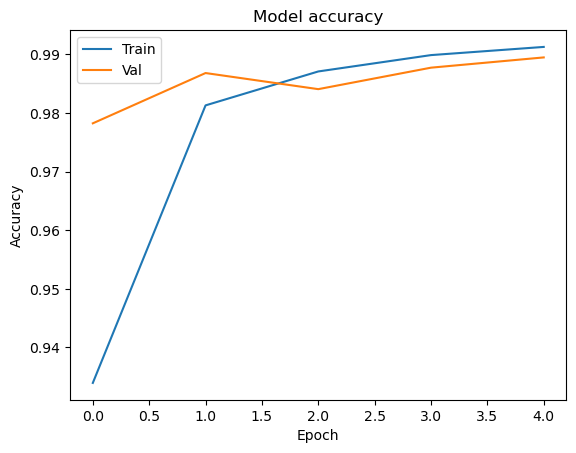

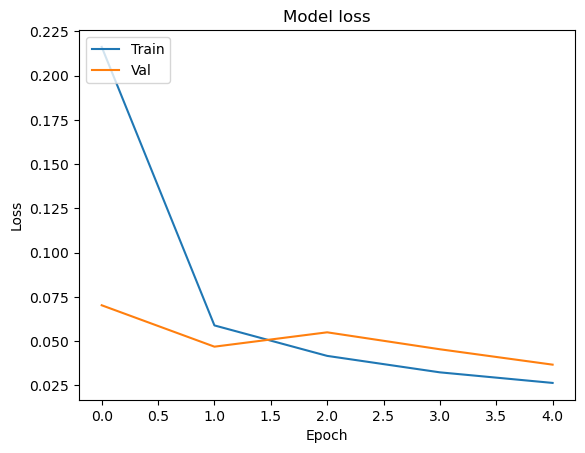

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(original_history.history['accuracy'])
plt.plot(original_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(original_history.history['loss'])
plt.plot(original_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Fine-tune the Model

In [7]:
# Add dropout layer for regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# Compile and Train the Model after fine-tune

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tuned_history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 40s 51ms/step - loss: 0.4246 - accuracy: 0.8672 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 2/5
750/750 [==============================] - 38s 50ms/step - loss: 0.1385 - accuracy: 0.9599 - val_loss: 0.0553 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 39s 53ms/step - loss: 0.0962 - accuracy: 0.9733 - val_loss: 0.0469 - val_accuracy: 0.9863
Epoch 4/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0758 - accuracy: 0.9780 - val_loss: 0.0424 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0640 - accuracy: 0.9814 - val_loss: 0.0418 - val_accuracy: 0.9882


# Evaluate the Model after fine-tune

In [9]:
# Evaluate the original model
fine_tuned_test_loss, fine_tuned_test_acc = model.evaluate(test_images, test_labels)
print(f'Original model test accuracy: {original_test_acc}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0287 - accuracy: 0.9910
Original model test accuracy: 0.9902999997138977


313/313 [==============================] - 3s 8ms/step - loss: 0.0287 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


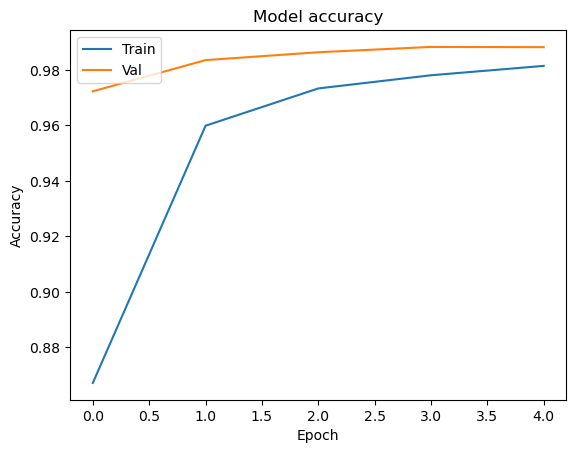

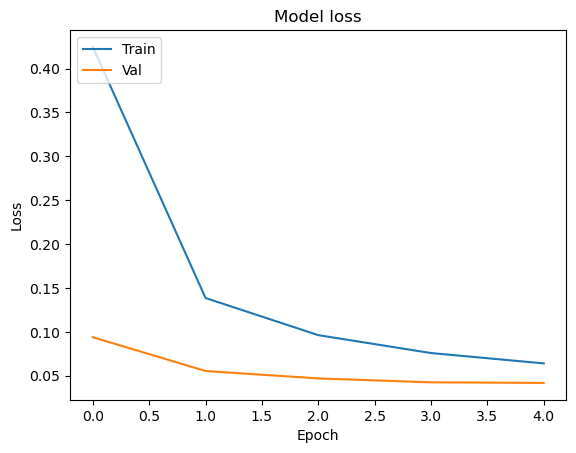

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(fine_tuned_history.history['accuracy'])
plt.plot(fine_tuned_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(fine_tuned_history.history['loss'])
plt.plot(fine_tuned_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [12]:
print(f'Original model test accuracy: {original_test_acc * 100:.2f}%')
print(f'Fine-tuned model test accuracy: {fine_tuned_test_acc * 100:.2f}%')

print(f'Original model test loss: {original_test_loss * 100:.2f}%')
print(f'Fine-tuned model test loss: {fine_tuned_test_loss * 100:.2f}%')


Original model test accuracy: 99.03%
Fine-tuned model test accuracy: 99.10%
Original model test loss: 2.90%
Fine-tuned model test loss: 2.87%


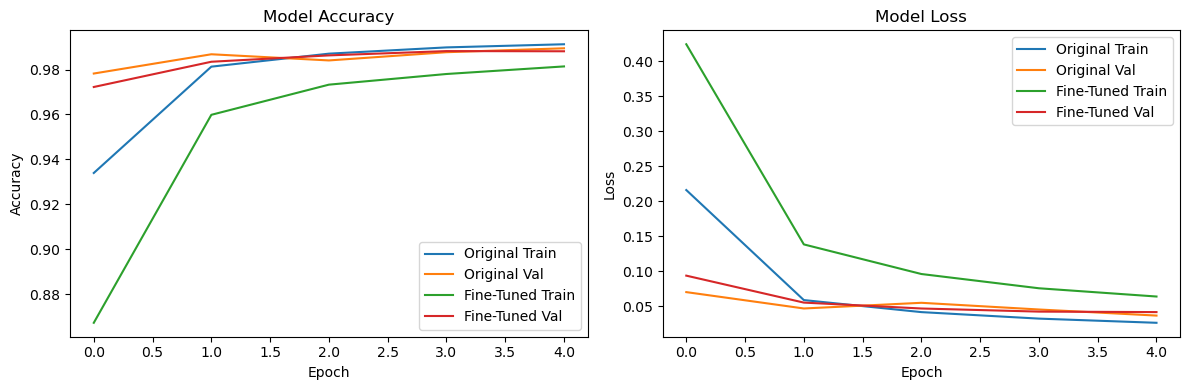

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Train')
plt.plot(original_history.history['val_accuracy'], label='Original Val')
plt.plot(fine_tuned_history.history['accuracy'], label='Fine-Tuned Train')
plt.plot(fine_tuned_history.history['val_accuracy'], label='Fine-Tuned Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(original_history.history['loss'], label='Original Train')
plt.plot(original_history.history['val_loss'], label='Original Val')
plt.plot(fine_tuned_history.history['loss'], label='Fine-Tuned Train')
plt.plot(fine_tuned_history.history['val_loss'], label='Fine-Tuned Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
